#Linear Algebra

In [28]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

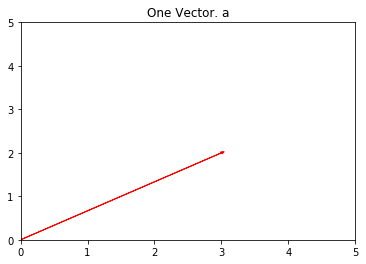

In [2]:



vector = [3,2]

# Plot it as a Vector arrow
ax = plt.axes()
ax.arrow(0,0, vector[0], vector[1], head_width=.05, head_length=0.05, color ='red')
plt.title("One Vector. a")
ax.set_xlim(0,5)
ax.set_ylim(0,5)

plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = [17, -4, -2, 1]

c =[x**2 ]


np.linalg.norm(b)

17.606816861659009

The norm (or Magnitude) of a vector is it's length. Because it's a line, it can be represented as the hypoteneuse of a triangle and use the pythagorean theorm to find it's length

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = [3,7,-2,12]
d = [9,-7,4,6]

np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [10]:
from sympy import *
init_printing(use_unicode=True)

e = Matrix([[7,4,2],[1,3,-1],[2,6,-4]])

e.T


⎡7  1   2 ⎤
⎢         ⎥
⎢4  3   6 ⎥
⎢         ⎥
⎣2  -1  -4⎦

This is the transpose of E above

In [11]:
e**-1

⎡       -14        ⎤
⎢3/17   ────  5/17 ⎥
⎢        17        ⎥
⎢                  ⎥
⎢        16        ⎥
⎢-1/17   ──   -9/34⎥
⎢        17        ⎥
⎢                  ⎥
⎣  0     1    -1/2 ⎦

This is the inverse of e

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [13]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [20]:
##### Your Code Here #####

for col in df.columns:
    print(str(col)+ ' mean: '+ str(np.mean(df[col])) )
    print(str(col)+ ' variance: '+ str(np.var(df[col])) )
    print(str(col)+ ' stdev: '+ str(np.std(df[col])) )



customers mean: 1135.71428571
customers variance: 84653.0612245
customers stdev: 290.951991271
snow mean: 2.71428571429
snow variance: 7.34693877551
snow stdev: 2.71052370872


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [30]:
np.linalg.norm(df['snow']), np.linalg.norm(df['customers'])



In [31]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


The covariance matrix shows that snow and customers have a positive correlation, but this is likely not a significant finding. Since the magnitude of customers is so much larger than snow, it 

In [24]:
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


The correlation coefficient normalizes for scale and shows that customers and snow are positively correlated.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [32]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [33]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [36]:
##### Your Code Here #####
# import sscaler
from sklearn.preprocessing import StandardScaler


# I'm going to identify Country as our target and all the other columns as features:
features = df.columns.tolist()
features.remove('Country')

target = 'Country'


In [53]:
# now I seperate out the features:
x = df.loc[:,features].values

# seperate target
y = df.loc[:,target].values

# standardize this M***F****!
x = StandardScaler(with_std=True).fit_transform(x)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
std_df = pd.DataFrame(data = x, columns = features)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [55]:
std_df = pd.merge(std_df, df['Country'], left_index=True, right_index=True)
std_df.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


Weird, the mean is 0 but the standard deviation has standardized to 1.15, not sure why this is the case.

In [58]:
x.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

Ok, this explains it, in the dataframe, the std is being calculated a little differently, but the standardized datat has a std of 1

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [60]:
##### Your Code Here #####

# ok, so I guess we'll do 2 component PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pCs = pca.fit_transform(x)

p_df = pd.DataFrame(data = pCs,
                   columns = ['Principal Component 1', 'Principal Component 2'])

In [66]:
# Looks like 
final_pca_df = pd.concat([p_df, df[target]], axis=1)
final_pca_df

,Principal Component 1,Principal Component 2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


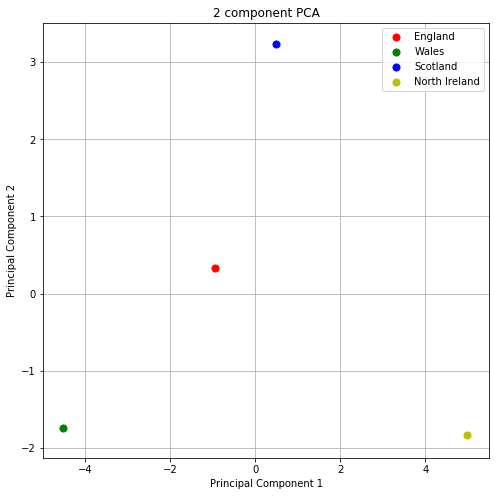

In [78]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

targets = final_pca_df['Country'].tolist()
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indice = final_pca_df['Country'] == target
    ax.scatter(final_pca_df.loc[indice, 'Principal Component 1'], 
               final_pca_df.loc[indice, 'Principal Component 2'],
              c = color,
              s = 50)


ax.legend(targets)
ax.grid()


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [80]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [82]:
##### Your Code Here #####
from sklearn.cluster import KMeans

# I'm going to make an elbow graph to get a quick idea of how many K's I want
data_transformed = points.loc[:,points.columns.tolist()].values

sum_of_squared_distances = []
K = range(1,31)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)

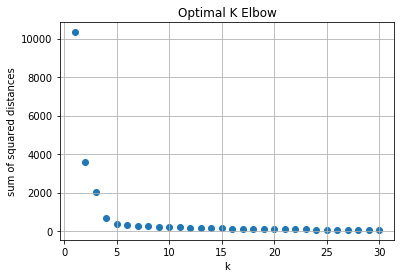

In [85]:
# Data for plotting
x = K
y = sum_of_squared_distances

fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set(xlabel='k', ylabel='sum of squared distances',
       title='Optimal K Elbow')
ax.grid()

# fig.savefig("test.png")
plt.show()

Looks like K = 4 or 5 is the joy in this dataset 

In [86]:
# So let's try and do a k-means grouping with 4 Ks
kmeans = KMeans(n_clusters=4)

# put column data into X
# X = df.loc[:,df.columns.tolist()].values

kmeans.fit(points)
labels = kmeans.labels_

In [99]:
# add the labels to the df
new_series = pd.Series(labels)
points['clusters'] = new_series.values
# points.head()
# points.shape
# points['clusters'].unique()
# points.clusters.tolist()

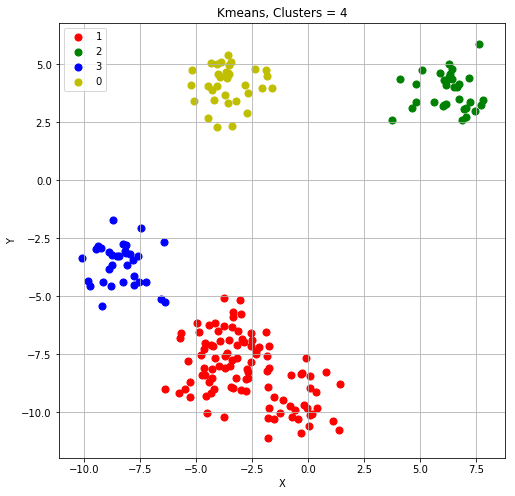

In [98]:
# Now I graph:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Kmeans, Clusters = 4')

targets = [1,2,3,0]
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets,colors):
    indice = points.clusters == target
    ax.scatter(points.loc[indice, 'x'], 
               points.loc[indice, 'y'],
              c = color,
              s = 50)


ax.legend(targets)
ax.grid()